In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn
from sklearn import datasets, linear_model


# This script help us to find who using the Public Assistance Agencies

In [2]:
def merge_Ind_Col(dataframe):
    '''
    Our data frame we read has many index columns and many headers and ti readh a data, a tuple required to reach it and this function merges and decrease the headder and index to one
    :param:dataframe: pandas.dataframe
    :return: rtn:  pandas.dataframe
    '''
    Update_col_names=[]
    for col in dataframe.columns:
        Update_col_names.append(' '.join(col))
    Update_index_names=[]
    for ind in dataframe.index:
        Update_index_names.append(' '.join(ind))
    b=dataframe.values[:,:]
    rtn=pd.DataFrame(b,columns=Update_col_names,index=Update_index_names)
    return rtn

In [3]:
census_data_table_12=pd.read_excel('../US_census//table12.xlsx',skiprows=4,skipfooter= 62,header=[0, 1],index_col=[0,1]).fillna(method='ffill')
census_data_table_12.name='Table 12. Family Members, by Age and Family Income'
census_data_table_12=merge_Ind_Col(census_data_table_12)
census_data_table_12.head()

c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Total registered1 Unnamed: 2_level_1,Percent distribution of methods of registration At department of motor vehicles,Percent distribution of methods of registration At public assistance agency,Percent distribution of methods of registration Mailed form to election office,Percent distribution of methods of registration Registered using the Internet or online,"Percent distribution of methods of registration At school, hospital, campus",Percent distribution of methods of registration At county or government registration office,Percent distribution of methods of registration At registration drive,Percent distribution of methods of registration At polls on election day,Percent distribution of methods of registration Other place/way,Percent distribution of methods of registration Don't know or refused
TOTAL,168308.0,27.7,0.9,12.4,11.5,2.9,14.2,2.7,4.6,3.5,19.7
Age 18 to 24 years,15984.0,28.1,0.7,10.6,21.4,7.1,7.8,1.9,3.5,2.5,16.3
Age 25 to 44 years,53203.0,32.0,1.1,11.9,17.9,2.9,8.6,2.3,3.7,2.7,17.0
Age 45 to 64 years,57226.0,29.2,0.8,13.1,8.1,2.4,15.0,3.0,4.7,3.5,20.2
Age 65 years and over,41895.0,19.8,0.9,12.9,4.1,2.0,22.4,3.3,5.9,5.0,23.6


([<matplotlib.patches.Wedge at 0x24c1ecdf040>,
 [Text(0.9647533012958164, 0.5284421138013358, 'Educational attainment Less than high school graduate'),
  Text(0.010600280770821952, 1.099948923381254, 'Family income2  $20,000 to $29,999'),
  Text(-0.9936789683125916, 0.47180727838093356, 'Family income2  Under $10,000'),
  Text(-0.7588543057332021, -0.796329167285853, 'Family income2  $10,000 to $14,999'),
  Text(0.7433664256511927, -0.8108059923400727, 'Family income2  $15,000 to $19,999')])

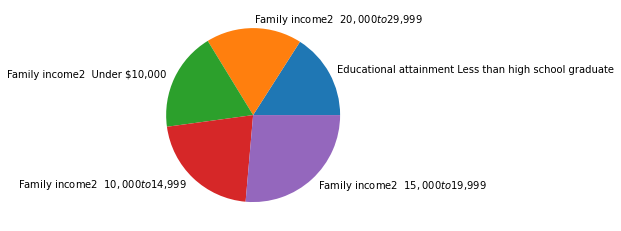

In [5]:
# which demografy using this agencies 
census_data_table_12['Percent distribution of methods of registration At public assistance agency']
plt.pie(census_data_table_12['Percent distribution of methods of registration At public assistance agency'].sort_values()[-5:],labels=census_data_table_12['Percent distribution of methods of registration At public assistance agency'].sort_values()[-5:].index)